In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

C = 1                         # SVM의 regularization parameter
model = svm.SVC(kernel = "linear", C=C)
model.fit(X,y)

SVC(C=1, kernel='linear')

In [3]:
from sklearn.metrics import confusion_matrix    # confusion_matrix라이브러리
y_pred = model.predict(X)                         # 학습데이터 분류예측
confusion_matrix(y, y_pred)                     # 정확성검정

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

In [4]:
# LinearSVM 활용
clf = svm.LinearSVC(C=C, max_iter = 10000)              # 학습 반복횟수 10000
clf.fit(X,y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

In [5]:
# rbf 활용

model_rbf = svm.SVC(kernel = 'rbf', gamma = 0.7, C=C, max_iter = 10000)    
#gamma는 sigma^2에 해당하는 scale parameter
#학습 반복횟수 10000

model_rbf.fit(X,y)
y_pred = model_rbf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]])

In [6]:
# polynomial 활용

model_poly = svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=C, max_iter = 10000)    
#3차항으로 설정, degree = 3
#gamma는 sigma^2에 해당하는 scale parameter
#학습 반복횟수 10000

model_poly.fit(X,y)
y_pred = model_poly.predict(X)
confusion_matrix(y, y_pred)

/Users/jojuhyeon/opt/anaconda3/envs/parrot/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([[50,  0,  0],
       [ 0, 34, 16],
       [ 0, 11, 39]])

In [7]:
# 함수 정의
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, model, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
 

In [8]:
# 모델 정의&피팅
C = 1.0 #regularization parameter0
models = (svm.LinearSVC(),
          svm.SVC(kernel='rbf', gamma=1, C=2),
          svm.SVC(kernel='rbf', gamma=10, C=2),
          svm.SVC(kernel='rbf', gamma=100, C=2))
models = (clf.fit(X, y) for clf in models)

In [9]:
# plot title 형성
titles = ('LinearSVC',
          'gamma = 1',
          'gamma = 10',
          'gamma = 100')

/Users/jojuhyeon/opt/anaconda3/envs/parrot/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


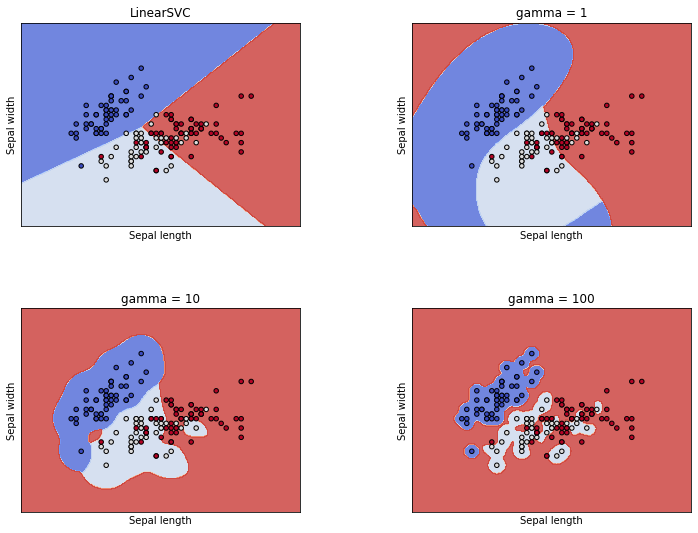

In [10]:
# plot 그리기
# plt.subplots(2,2,figsize=(15,15))

fig, sub = plt.subplots(2, 2, figsize = (12,9))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    

plt.show()

In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

iris_data = datasets.load_iris()

features = iris_data.data
target = iris_data.target

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

model = svm.SVC()

param_grid = { 'C' : [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100, 200], 
              'gamma' : [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(model, param_grid, refit=True)
grid.fit(x_train, y_train)

print(grid.best_params_)

grid_prediction = grid.predict(x_test)
print(confusion_matrix(y_test, grid_prediction))
print(accuracy_score(y_test, grid_prediction))

{'C': 30, 'gamma': 0.01, 'kernel': 'rbf'}
[[19  0  0]
 [ 0 10  1]
 [ 0  0 15]]
0.9777777777777777
